## 1.0 Data Preprocessing

This notebook is the first stage of the project, and it is used to merge the datasets before data cleansing. We have also performed some feature selection in this notebook, as some features are not related to our objectives and features with large portion of missing data will also be removed to reduce biases. Script is a python script to load the data from Excel files. It contains a class object "ImportData", which is designed to make code tidier and cleaner.

In [1]:
from script import ImportData

In [2]:
df = ImportData()

In [3]:
df.get_columns()

Index(['REPORT_ID', 'UND_UNIT_NUMBER', 'CASUALTY_NUMBER', 'Casualty Type',
       'Sex_x', 'AGE', 'Position In Veh', 'Thrown Out', 'Injury Extent',
       'Seat Belt', 'Helmet', 'Hospital', 'Unit No', 'No Of Cas',
       'Veh Reg State', 'Unit Type', 'Veh Year', 'Direction Of Travel',
       'Sex_y', 'Age', 'Lic State', 'Licence Class', 'Licence Type', 'Towing',
       'Unit Movement', 'Number Occupants', 'Postcode_x', 'Rollover', 'Fire',
       'Stats Area', 'Suburb', 'Postcode_y', 'LGA Name', 'Total Units',
       'Total Cas', 'Total Fats', 'Total SI', 'Total MI', 'Year', 'Month',
       'Day', 'Time', 'Area Speed', 'Position Type', 'Horizontal Align',
       'Vertical Align', 'Other Feat', 'Road Surface', 'Moisture Cond',
       'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp', 'Entity Code',
       'CSEF Severity', 'Traffic Ctrls', 'DUI Involved', 'Drugs Involved',
       'ACCLOC_X', 'ACCLOC_Y', 'UNIQUE_LOC'],
      dtype='object')

In [4]:
df.get_data_shape()

The data contains 12361 rows and 61 columns.


## 1.1 Data selection

### Null report
        The report shows the percentage of missing data for features containing null values

,Null Count,% of null count
Position In Veh,1585,12.822587
Thrown Out,681,5.509263
Seat Belt,2620,21.195696
Helmet,10331,83.577380
Hospital,3063,24.779549
Veh Reg State,1586,12.830677
Veh Year,1587,12.838767
Lic State,1585,12.822587
Licence Class,1587,12.838767
Licence Type,1587,12.838767


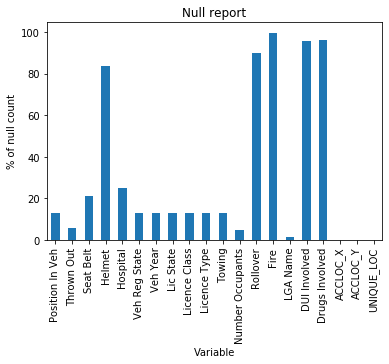

In [5]:
df.null_report()

### Features removed
Based on result in the plot above, **'Helmet'**, **'Rollover'**, **'Fire'**, **'DUI Involved'**, **'Drugs Involved'** contain 80% or more missing data, and it is counterintuitive to impute these categorical columns, as a result, these columns would be dropped for later analysis.<br> 

Features that are also removed include: 

**'Hospital'** : describes the name of the hospital where a casualty is treated or admitted, and it is not directly relevant to the objectives. <br>
**'Unit No'** : ID number of each unit involved in each accident. <br> 
**'Towing'** : A code defining if the unit was towing another unit <br> 
**'Postcode_x'**,**'Postcode_y'**,**'UNIQUE_LOC'** : xy coordinate and suburb information would be used instead. <br>
**'Total Fats'**,**'Total SI'**, **'Total MI'** : we want to predict the outcome of causalty in accident, so having these features as predictors would cause collinearity issue as there is a strong relationship between number of fatality and the fatal state of causalty, number of severely injuried casualty in the accident. <br>
**'Year'**, **'Month'**: we are not interested if there is a trend existed, each accident is independent and they are not associated with time. <br>
**'Other Feat'** : less information can be generated from. <br>
**'Unit Resp'**, **'Entity Code'**: the features describe who the fault in the accident belongs to, which can be unreliable and subjective decision so, it is not used in the further analysis.
**'Veh Year'**,**'Veh Reg State'**,**'Lic State'**,**'Lic State'**, **'Licence Class'**,**'Age'**,**'Sex_y'**,
**'LGA Name'**,**'ACCLOC_X'**, **'ACCLOC_Y'**

### Features remained

### Individual
**'Casualty Type'**: A code defining the entity injured in a unit in a roadcrash-> Driver/Passenger (binary categorical)<br>
**'Sex_x'** : gender of the entity in a casulty report male/female (binary categorical)<br> 
**'AGE'** : age of the entity in a casulty report - (continous) <br> 
**'Position In Veh'** : A description of the position of a casualty in or on a unit involved in a road crash (categorical)<br>
**'Thrown Out'** : An indication of whether the casualty is thrown out of a unit as a result of a road crash (binary categorical)<br>
**'Injury Extent'** : A description of the severity of the injury sustained as a result of a road crash (categorical response) <br>

### Driver 
**'Seat Belt'** : An indicator of the casualty's seatbelt usage in a road crash (binary categorical response)<br>
**'Total Cas'** : The total number of casualties in a road crash (discrete continous)<br>
**'Unit Type'**, **'Unit Movement'**,**'Number Occupants'**: description of the unit associated with the casualty <br>
**'Licence Type'**: description of the driver associated with the casualty <br>

### Environmental Factors 
**'Stats Area'**,**'Total Units'**,**'Day'**, **'Time'** ,**'Area Speed'**,**'Position Type'**,**'Horizontal Align'**,**'Vertical Align'**,, **'Moisture Cond'**,**'Weather Cond'**, **'DayNight'**,**'Crash Type'**,**'Traffic Ctrls'** : description of the accident (categorical/ continous)

In [6]:
columns_to_removed = ['Helmet', 'Hospital', 'Unit No', 'Towing','Postcode_x', 'Postcode_y','Direction Of Travel','Rollover', 'Fire','No Of Cas','Total Fats', 'Total SI', 'Total MI', 'Year', 
'Month', 'Other Feat', 'Unit Resp', 'Suburb','Entity Code', 'DUI Involved', 'Drugs Involved', 'UNIQUE_LOC','Veh Year','Veh Reg State','Lic State','Age','Sex_y','Licence Class',
                     'Direction Of Travel','Road Surface','CSEF Severity','ACCLOC_X', 'ACCLOC_Y','LGA Name']

In [7]:
df.remove_cols_from(columns_to_removed)

After removal, the data contains 12361 rows and 28 columns.


In [8]:
df.get_columns()

Index(['REPORT_ID', 'UND_UNIT_NUMBER', 'CASUALTY_NUMBER', 'Casualty Type',
       'Sex_x', 'AGE', 'Position In Veh', 'Thrown Out', 'Injury Extent',
       'Seat Belt', 'Unit Type', 'Licence Type', 'Unit Movement',
       'Number Occupants', 'Stats Area', 'Total Units', 'Total Cas', 'Day',
       'Time', 'Area Speed', 'Position Type', 'Horizontal Align',
       'Vertical Align', 'Moisture Cond', 'Weather Cond', 'DayNight',
       'Crash Type', 'Traffic Ctrls'],
      dtype='object')

In [10]:
df.save_data_to_csv('Datas/data_preprocess.csv')